In [1]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [2]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [4]:
import matplotlib

In [9]:
system_name = ['gem5','pcm']
calibs = 'UnCalib'

all_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']

zm_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CRd','CS1','CS3','EI','EF','ED1','EM1','EM5','MI','MC'
                 ,'MCS','MI','MD','MIM','MIM2']

control_cond_benchmarks = ['CCa','CCe','CCm','CCh_st']

control_benchmarks = ['CRf','CRm','CRd','CS1','CS3']

memory_benchmarks = ['MC','MCS','MI','MIM','MIM2']

mcs =['MC','MCS']

execution_benchmarks = ['EI','EF','ED1','EM1','EM5']


In [10]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '',filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])

In [11]:
#Function to extract stats from PCM
def pcmGetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 2
        end = r.find('\n', start)
       # print(r[start:end])
        return float(r[start:end])


## GEM5 DATAFRAME

In [8]:
rows = []
for bm in zm_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                 gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
gem5_df['Cond_branch_mispred'] = gem5_df['CondIndirect']/gem5_df['CondPred']
gem5_df['Total_branch_mispred'] =gem5_df['Total_mispred']/gem5_df['Total_branches']







FileNotFoundError: [Errno 2] No such file or directory: '/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/gem5/Calib/CRm/stats.txt'

## PCM DATAFRAME

In [12]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for bm in control_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'IPC'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_TOTAL_INSTR_RETIRED_events'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_TOTAL_events'),
                    None,None,
                    None,None,None,None,None,None
                ])
    
for bm in control_cond_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                 None,None,None,None,None,None
                ])
    
for bm in execution_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,None,None,
                 None,None,None,None,None,None
                ])
    
for bm in memory_benchmarks:
        rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     None,None,
                     None,None,
                     None,None,None,None,None,None])
        
for bm in memory_benchmarks:
    rows.append([bm,None,
                    None,None,
                    None,None,
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_L1_MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_FB_HIT'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_LOADS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2HITS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_STORES'),
                ])
        

pcm_df = pd.DataFrame(rows, columns=['benchmark',
                                     'ipc','Total_branches','Total_mispred','CondTotal','CondPred','L1_load_miss','FB_hit',
                                     'Total_loads','RFO_L2_hits','RFO_L2_miss','Total_stores'])

pcm_df['Total_branch_mispred'] = pcm_df['Total_mispred']/pcm_df['Total_branches']

pcm_df['Cond_branch_mispred'] =pcm_df['CondPred']/pcm_df['CondTotal']

pcm_df['Total_L1_misses'] = (pcm_df['L1_load_miss'] ) + (pcm_df['RFO_L2_hits'] + pcm_df['RFO_L2_miss']) 

pcm_df['Total_access'] = (pcm_df['Total_loads']+pcm_df['Total_stores'])

pcm_df['L1_missrate'] = (pcm_df['Total_L1_misses']) /pcm_df['Total_access']


In [26]:
## Stacked Graph
def doplot_stacked_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[gem5_df['benchmark']==bm]
            ax.bar(i,d[stat_pcm], color='C'+str(1))
            ax.bar(i,g[stat_gem5], color='C'+str(0))
            i=i+1
        
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names)), benchmark_names, rotation=40, ha='right')

In [13]:
##Graph
def doplot_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        g=gem5_df[gem5_df['benchmark']==bm]
        ax.bar(i,d[stat_pcm], color='C'+str(1))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(0))
        i=i+2
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+i/2, benchmark_names, rotation=40, ha='right')

In [13]:
    test1 = gem5_df[gem5_df['benchmark']=='MC']
    test2 = pcm_df[pcm_df['benchmark']=='MC']
    
    print(pcm_df['MEM_INST_RETIRED_ALL_LOADS'])

    print(gem5_df[''])
  

## IPC

<IPython.core.display.Javascript object>


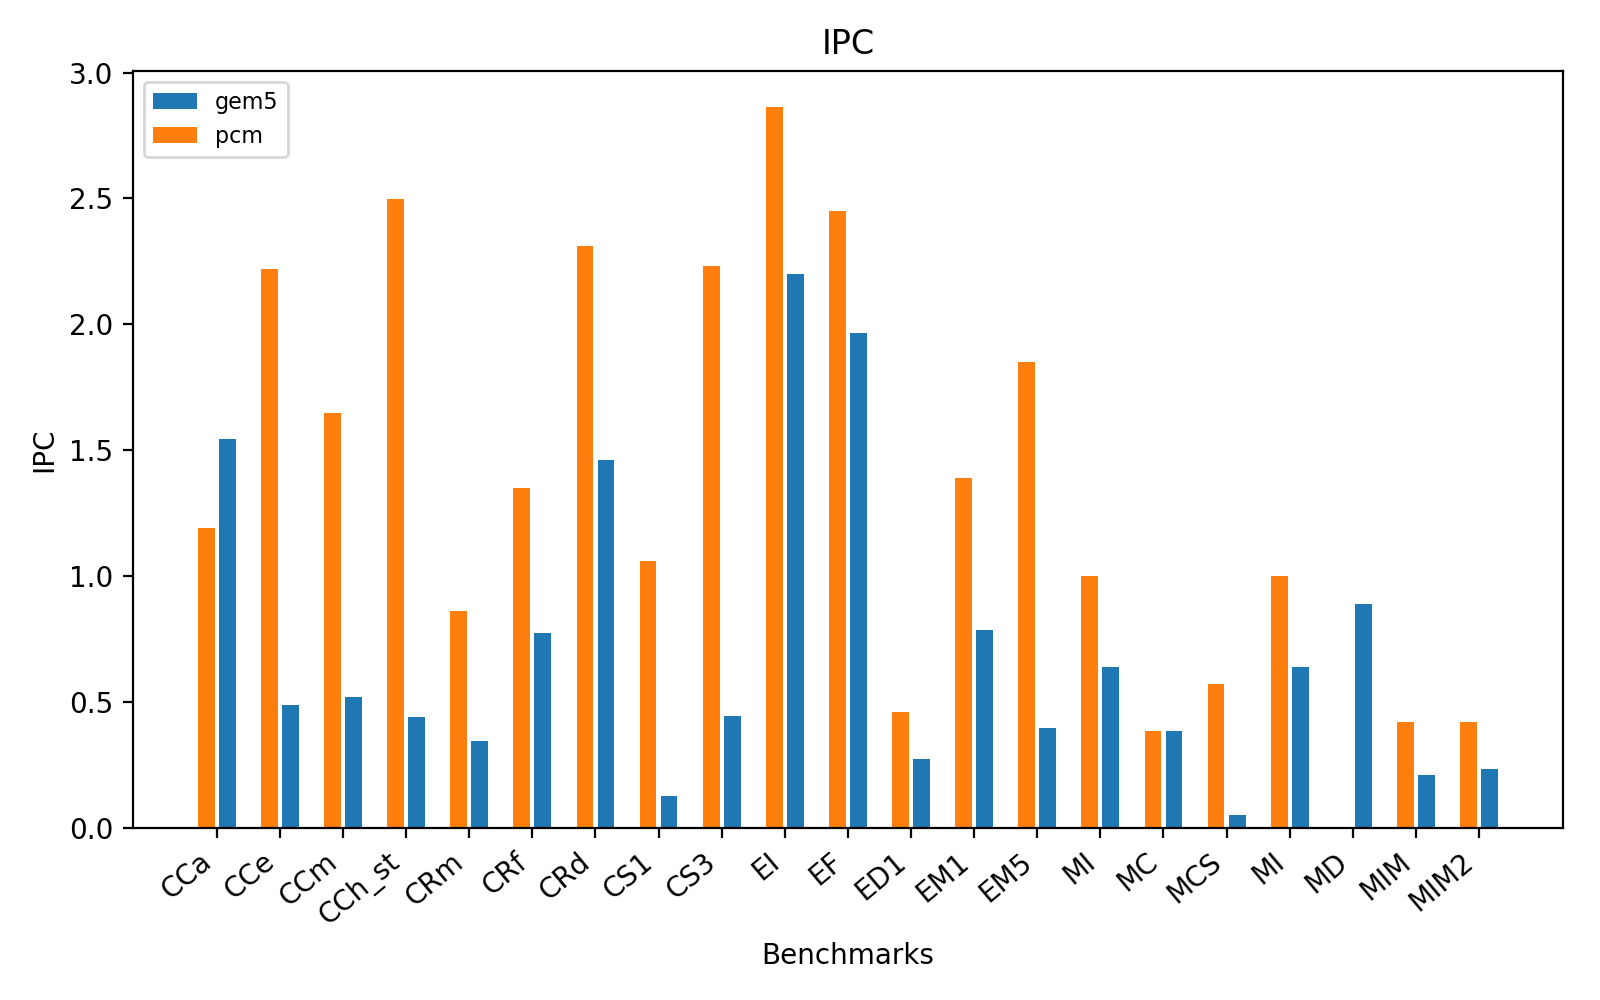

In [11]:
#IPC

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)


## Control conditonal branch misses

In [14]:
#Control condiitonal branch misses

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Conditional_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_Cc_hw+gem5.png', format='png', dpi=600)

<IPython.core.display.Javascript object>

NameError: name 'gem5_df' is not defined

## Control Branch misses

<IPython.core.display.Javascript object>


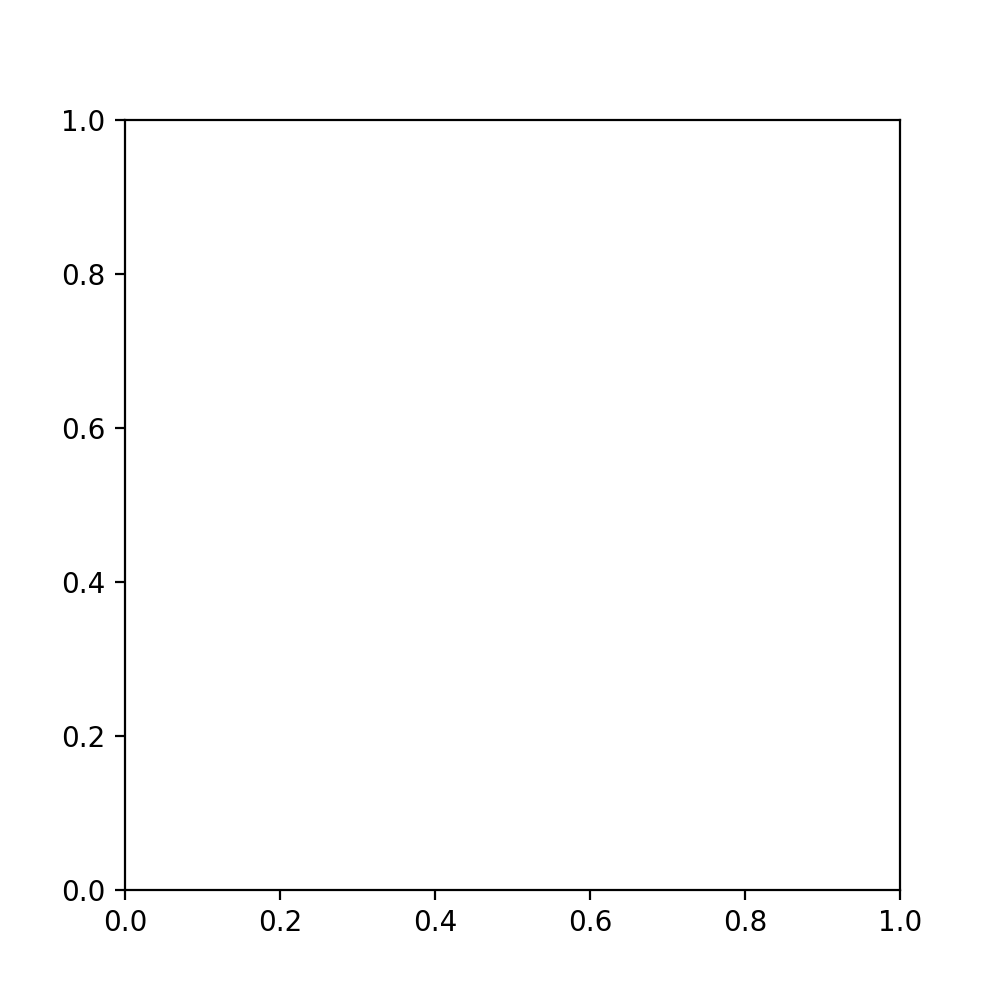

NameError: name 'gem5_df' is not defined

In [15]:
#Control Branch misses

benchmarks = control_benchmarks
benchmark_names = control_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Total_branch_mispred','Total_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_hw+gem5.png', format='png', dpi=600)

## L1 misses

<IPython.core.display.Javascript object>


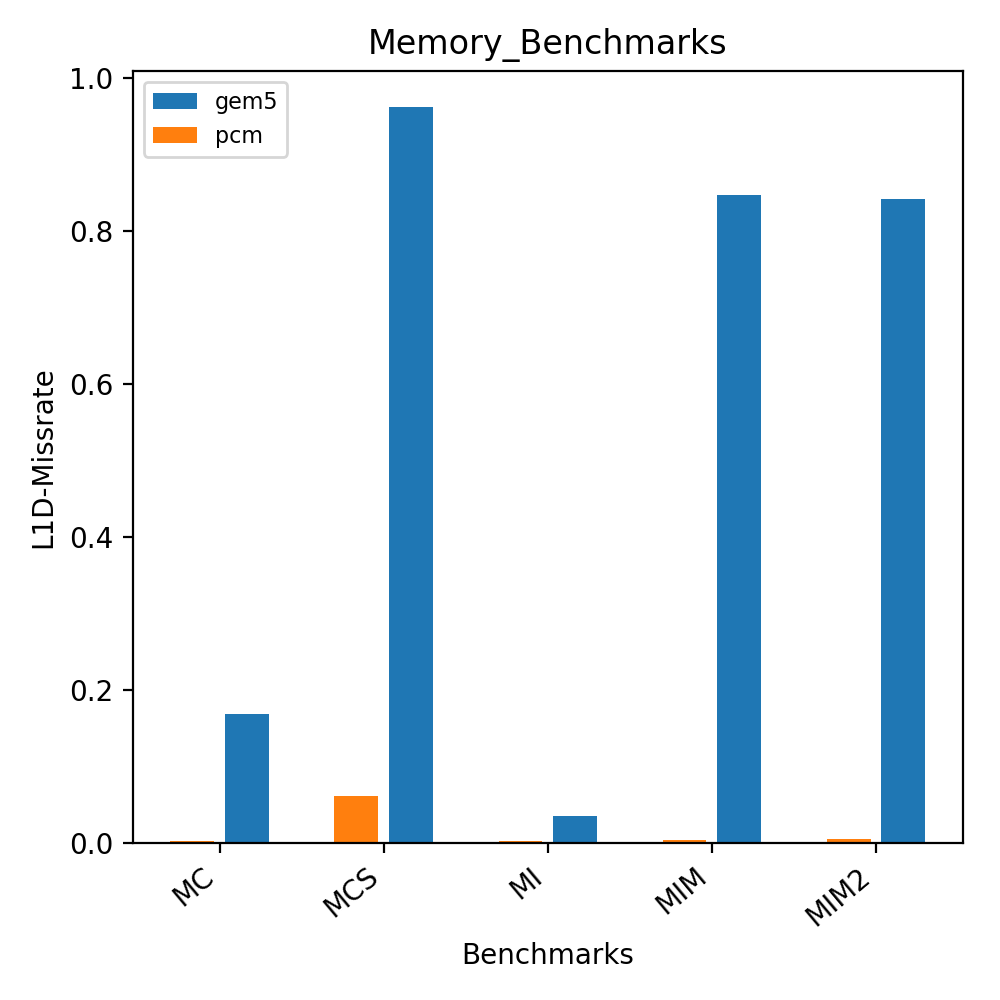

In [12]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)

## --------------------------------------------------------------------------------------------------------
# Memory Benchmarks Analysis

In [21]:
rows = []
for bm in memory_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_bm_new'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])


FileNotFoundError: [Errno 2] No such file or directory: '/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/gem5/memory_bm_new/Calib/MC/stats.txt'

In [15]:
rows = []
for bm in memory_benchmarks:
    rows.append([bm,gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'sim_insts'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'sim_ops'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'host_op_rate'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                   gem5GetStat(system_name[0]+'/'+'memory_gem520'+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                ])

gem5_df = pd.DataFrame(rows, columns=['benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
print(gem5_df)

  benchmark        cycles  instructions       ops  host_op_rate  \
0        MC  3.251597e+05      120824.0  241862.0      203781.0   
1       MCS  2.230100e+06      137208.0  200902.0       48658.0   
2        MI  1.436811e+05      112850.0  217682.0      302679.0   
3       MIM  1.260556e+05       30927.0   64049.0      120255.0   
4      MIM2  1.145786e+05       30927.0   64049.0      145969.0   

   overall_missrate       ipc  overall_l1d_miss  overall_l1d_hits  \
0          0.140605  0.319137           11462.0           70057.0   
1          0.963867  0.052842           74104.0            2778.0   
2          0.035265  0.674561            2426.0           66368.0   
3          0.856683  0.210715           16773.0            2806.0   
4          0.852423  0.231821           16693.0            2890.0   

   overall_l1_latency  
0         135398406.0  
1         743540512.0  
2         148684536.0  
3         560024322.0  
4         392839304.0  


<IPython.core.display.Javascript object>


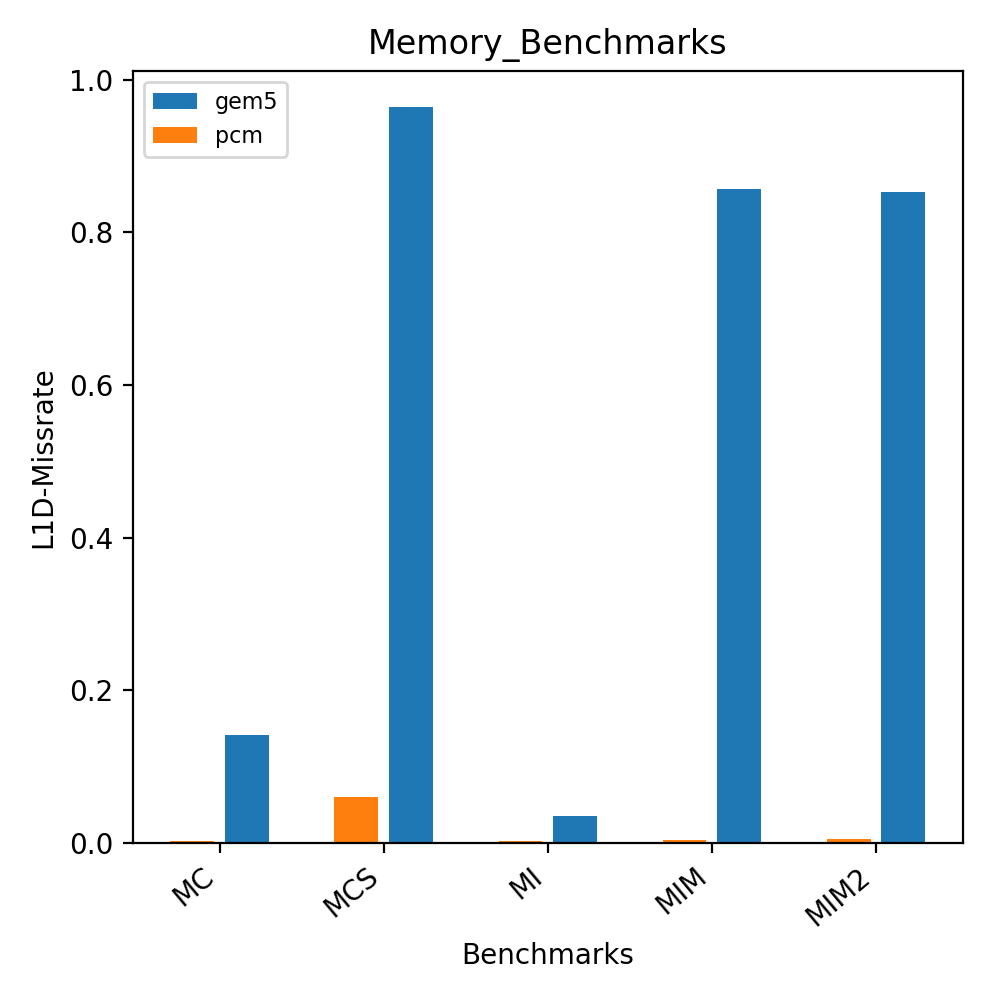

In [13]:
#L1 misses without fillbuffer hits.

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)


<IPython.core.display.Javascript object>


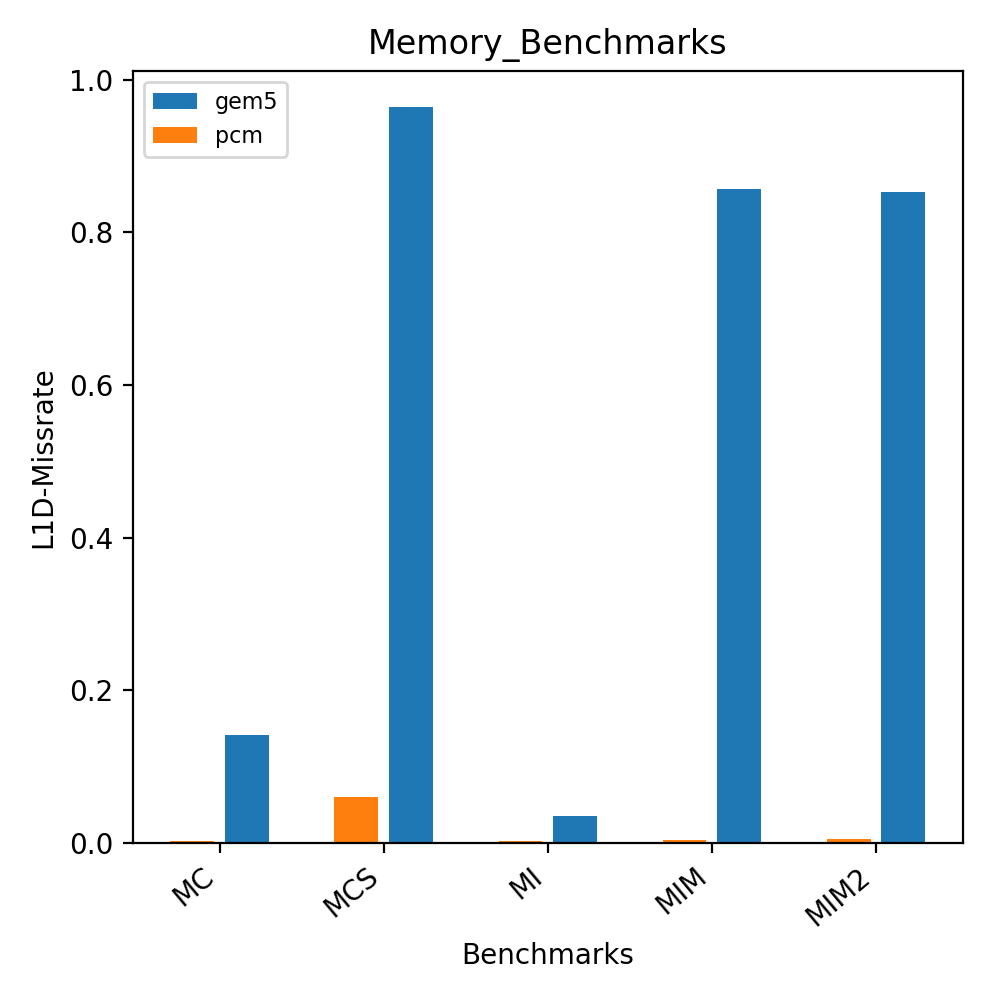

In [14]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)
